In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import seaborn as sns

In [2]:
sbi = pd.read_csv("SBI_Historical_Data.csv")
sbi.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 07, 2020",190.65,191.45,192.10,189.55,44.82M,-0.16%
1,"Aug 06, 2020",190.95,192.30,194.50,190.25,59.74M,-0.26%
2,"Aug 05, 2020",191.45,192.75,196.85,191.00,68.89M,-0.08%
3,"Aug 04, 2020",191.60,193.35,193.80,190.50,43.87M,-0.34%
4,"Aug 03, 2020",192.25,192.00,194.60,190.05,72.46M,0.42%


In [3]:
#printing dimension of data
sbi.shape# 1385 rows, 7 columns

(1385, 7)

In [4]:
sbi.describe().T# stats summary of data

,count,mean,std,min,25%,50%,75%,max
Price,1385.0,266.274404,45.555277,150.85,245.65,270.80,296.15,372.40
Open,1385.0,266.903213,45.590664,151.95,245.90,271.15,296.50,371.95
High,1385.0,270.343682,45.829745,153.20,248.80,274.60,300.75,373.80
Low,1385.0,262.757906,45.248334,148.25,242.55,267.40,292.20,366.20


In [5]:
## Sort the Order Date 
sbi = sbi.sort_values('Date')

#print the sorted values
print(sbi.head(1))

#check any missing values
sbi.isnull().sum()

              Date   Price    Open    High     Low    Vol. Change %
1322  Apr 01, 2015  273.45  266.65  274.65  263.15  12.38M    2.40%


Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [6]:
sbi.groupby('Date')['Price'].sum().reset_index()

,Date,Price
0,"Apr 01, 2015",273.45
1,"Apr 01, 2016",195.65
2,"Apr 01, 2019",322.75
3,"Apr 01, 2020",186.55
4,"Apr 02, 2018",246.15
...,...,...
1380,"Sep 29, 2016",247.25
1381,"Sep 29, 2017",253.85
1382,"Sep 30, 2015",237.15
1383,"Sep 30, 2016",251.25


In [7]:
sbi['Date'] = pd.to_datetime(sbi['Date'])

In [8]:
#checking data type
sbi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 1322 to 212
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1385 non-null   datetime64[ns]
 1   Price     1385 non-null   float64       
 2   Open      1385 non-null   float64       
 3   High      1385 non-null   float64       
 4   Low       1385 non-null   float64       
 5   Vol.      1385 non-null   object        
 6   Change %  1385 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 86.6+ KB


In [9]:
#set 'Order Date' as index
sbi = sbi.set_index('Date')
sbi.index

DatetimeIndex(['2015-04-01', '2016-04-01', '2019-04-01', '2020-04-01',
               '2018-04-02', '2019-04-02', '2017-04-03', '2018-04-03',
               '2019-04-03', '2020-04-03',
               ...
               '2015-09-28', '2016-09-28', '2017-09-28', '2018-09-28',
               '2015-09-29', '2016-09-29', '2017-09-29', '2015-09-30',
               '2016-09-30', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=1385, freq=None)

In [10]:
sbi.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2015-04-01,273.45,266.65,274.65,263.15,12.38M,2.40%
2016-04-01,195.65,193.70,197.25,192.00,21.75M,0.72%
2019-04-01,322.75,321.80,327.65,321.05,22.37M,0.62%
2020-04-01,186.55,194.00,194.50,185.25,52.95M,-5.23%
2018-04-02,246.15,251.80,252.00,244.90,14.99M,-1.50%


<AxesSubplot:>

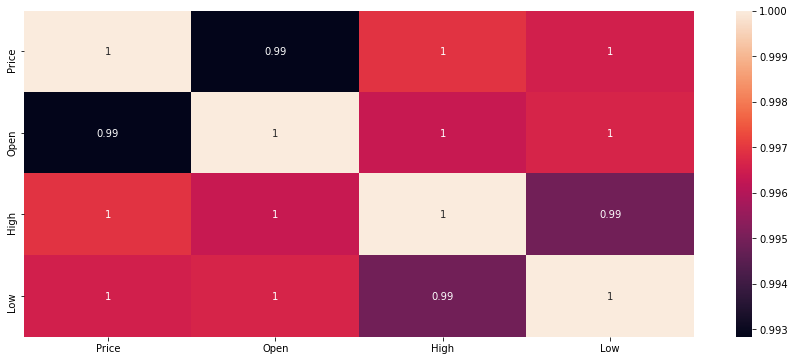

In [11]:
sns.heatmap(sbi.corr(), annot = True)

In [12]:
y = sbi['Price'].resample('MS').mean()
y['2020']

Date
2020-01-01    322.582609
2020-02-01    317.650000
2020-03-01    227.097619
2020-04-01    185.833333
2020-05-01    162.755263
2020-06-01    180.377273
2020-07-01    189.928261
2020-08-01    191.380000
Freq: MS, Name: Price, dtype: float64

In [13]:
y

Date
2015-01-01    314.902381
2015-02-01    296.115000
2015-03-01    281.002381
2015-04-01    279.800000
2015-05-01    277.922500
                 ...    
2020-04-01    185.833333
2020-05-01    162.755263
2020-06-01    180.377273
2020-07-01    189.928261
2020-08-01    191.380000
Freq: MS, Name: Price, Length: 68, dtype: float64

### ADF_test

In [14]:
#We are now going to apply - ADF [Augmented Diceky Fuller Method] 

# Objective-------to check if time series is stationary or not I.

from statsmodels.tsa.stattools import adfuller
dftest=adfuller(y, autolag='AIC')
(dftest)

# Here as per the below results, I could see the P value is .12 and test static is -2.46.
# Hence I cannot reject the NULL Hypothesis 
# Saying the TS is NON Stationary

(-2.460278553260961,
 0.1254404621479604,
 1,
 66,
 {'1%': -3.5335601309235605,
  '5%': -2.9064436883991434,
  '10%': -2.590723948576676},
 519.0401696934315)

In [15]:
# adf : float
#     Test statistic
# pvalue : float
#     MacKinnon's approximate p-value based on MacKinnon (1994, 2010)
# usedlag : int
#     Number of lags used
# nobs : int
#     Number of observations used for the ADF regression and calculation of
#     the critical values
# critical values : dict
#     Critical values for the test statistic at the 1 %, 5 %, and 10 %
#     levels. Based on MacKinnon (2010)
# icbest : float
#     The maximized information criterion if autolag is not None.
# resstore : ResultStore, optional
#     A dummy class with results attached as attributes

### KPSS_TEST

In [16]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print(kpss_output)

In [17]:
kpss_test(y)
#Here as per the below results, I could see the P value is .1 and test static is .14.
# Hence I cannot reject the NULL Hypothesis 
# Saying the TS is NON Stationary

Results of KPSS Test:
Test Statistic            0.141737
p-value                   0.100000
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


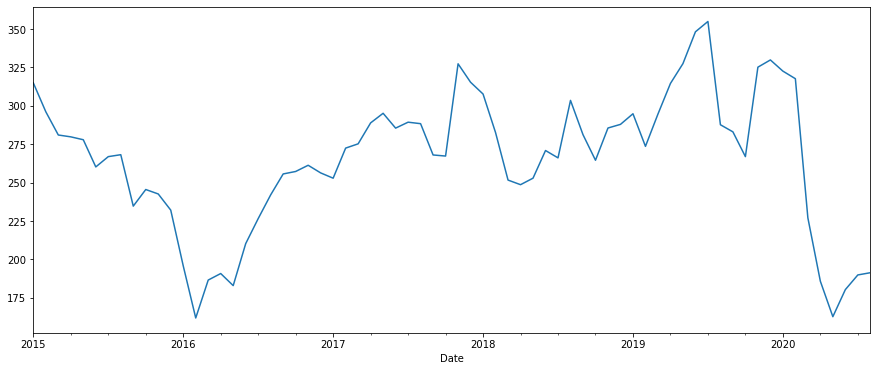

In [18]:
y.plot(figsize = (15, 6))
plt.show()

### DECOMPOSTION

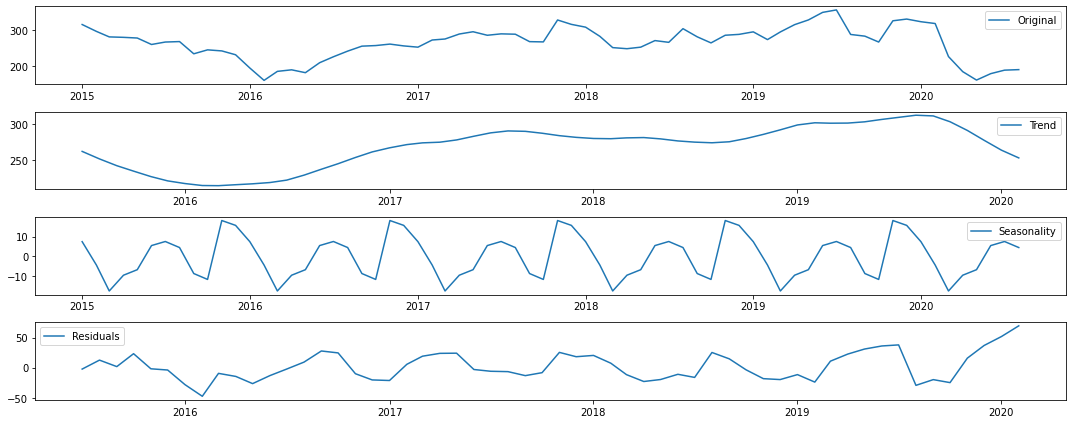

In [19]:
# Decomposition means - you are breaking the TS data into the each component:
#Trend | Seasonality | Irregularity
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

trend = decomposition.trend

seasonal = decomposition.seasonal

residual = decomposition.resid

plt.subplot(411)
plt.plot(y, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

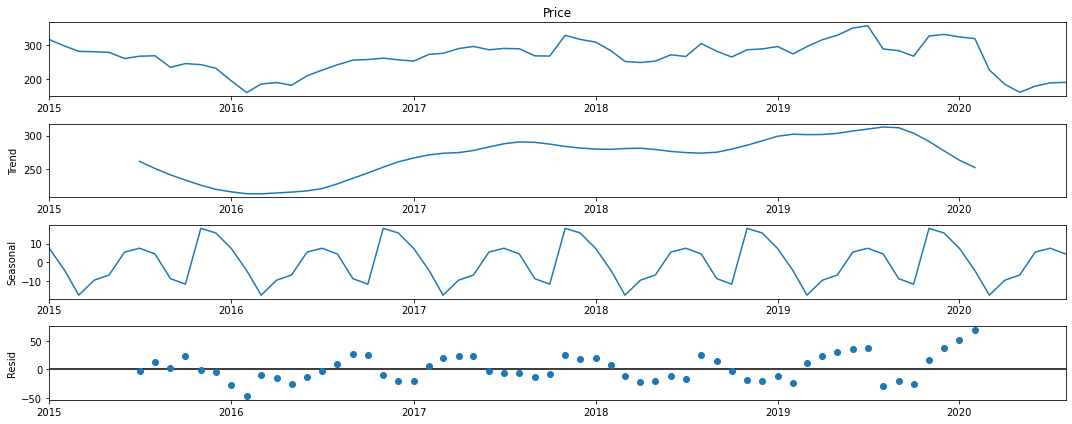

In [20]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

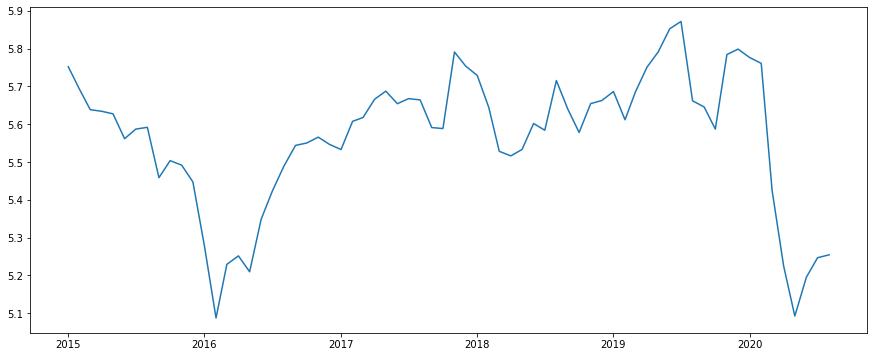

In [21]:
# Because you just have identified that your TS is Non STationary:
# Hence I will convert that to stationary

y_log = np.log(y)
plt.plot(y_log)
#plt.plot(y, color ='red')

**GRID SEARCH for paramenters**

In [51]:
# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 

p_values = [0, 1, 2, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(y.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=56.992
ARIMA(0, 0, 1) RMSE=40.123
ARIMA(0, 0, 2) RMSE=35.184
ARIMA(0, 1, 0) RMSE=30.499
ARIMA(0, 1, 1) RMSE=30.470
ARIMA(0, 1, 2) RMSE=31.274
ARIMA(0, 2, 0) RMSE=39.894
ARIMA(0, 2, 1) RMSE=31.123
ARIMA(0, 2, 2) RMSE=30.787
ARIMA(1, 0, 0) RMSE=30.376
ARIMA(1, 0, 1) RMSE=29.977
ARIMA(1, 0, 2) RMSE=29.876
ARIMA(1, 1, 0) RMSE=30.431
ARIMA(1, 1, 1) RMSE=32.072
ARIMA(1, 1, 2) RMSE=30.826
ARIMA(1, 2, 0) RMSE=36.529
ARIMA(1, 2, 1) RMSE=30.738
ARIMA(1, 2, 2) RMSE=32.318
ARIMA(2, 0, 0) RMSE=29.675
ARIMA(2, 0, 1) RMSE=30.335
ARIMA(2, 0, 2) RMSE=31.195
ARIMA(2, 1, 0) RMSE=30.762
ARIMA(2, 1, 1) RMSE=32.372
ARIMA(2, 1, 2) RMSE=30.648
ARIMA(2, 2, 0) RMSE=37.687
ARIMA(2, 2, 1) RMSE=31.037
ARIMA(2, 2, 2) RMSE=32.506
ARIMA(4, 0, 0) RMSE=30.751
ARIMA(4, 0, 1) RMSE=32.194
ARIMA(4, 0, 2) RMSE=32.751
ARIMA(4, 1, 0) RMSE=30.807
ARIMA(4, 1, 1) RMSE=32.978
ARIMA(4, 1, 2) RMSE=33.366
ARIMA(4, 2, 0) RMSE=35.379
ARIMA(4, 2, 1) RMSE=31.165
ARIMA(4, 2, 2) RMSE=33.521
ARIMA(6, 0, 0) RMSE=31.157
A

In [52]:
# AR Model
#We need to load the ARIMA model first:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(y, order=(8, 0, 0)) 

In [53]:
results = model.fit() 

results.fittedvalues

Date
2015-01-01    263.956523
2015-02-01    308.790550
2015-03-01    286.985653
2015-04-01    273.564810
2015-05-01    277.112022
                 ...    
2020-04-01    214.313151
2020-05-01    177.521122
2020-06-01    187.223150
2020-07-01    203.723464
2020-08-01    197.984424
Freq: MS, Length: 68, dtype: float64

Text(0.5, 1.0, 'RSS: 30461.3650')

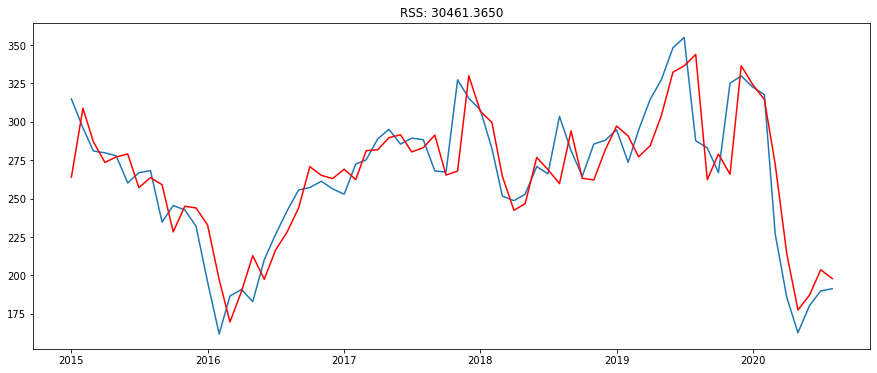

In [54]:
 #RSS=30461.3650
results_AR = model.fit() 
 

plt.plot(y)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-y)**2))

In [55]:
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                   68
Model:                     ARMA(8, 0)   Log Likelihood                -302.967
Method:                       css-mle   S.D. of innovations             20.362
Date:                Mon, 08 Mar 2021   AIC                            625.934
Time:                        23:27:12   BIC                            648.129
Sample:                    01-01-2015   HQIC                           634.728
                         - 08-01-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         263.9565     12.114     21.789      0.000     240.213     287.700
ar.L1.Price     1.0446      0.111      9.397      0.000       0.827       1.262
ar.L2.Price    -0.1301      0.164     -0.793    

In [56]:
results_AR.forecast

<bound method ARMAResults.forecast of <statsmodels.tsa.arima_model.ARMAResults object at 0x0000013A09EBC700>>

In [57]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print(predictions_ARIMA_diff)

Date
2015-01-01    263.956523
2015-02-01    308.790550
2015-03-01    286.985653
2015-04-01    273.564810
2015-05-01    277.112022
                 ...    
2020-04-01    214.313151
2020-05-01    177.521122
2020-06-01    187.223150
2020-07-01    203.723464
2020-08-01    197.984424
Freq: MS, Length: 68, dtype: float64


In [58]:
comp_forecast = pd.DataFrame(y)

In [59]:
comp_forecast['Prediction'] = predictions_ARIMA_diff

In [60]:
comp_forecast

,Price,Prediction
Date,,
2015-01-01,314.902381,263.956523
2015-02-01,296.115000,308.790550
2015-03-01,281.002381,286.985653
2015-04-01,279.800000,273.564810
2015-05-01,277.922500,277.112022
...,...,...
2020-04-01,185.833333,214.313151
2020-05-01,162.755263,177.521122
2020-06-01,180.377273,187.223150


In [61]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2015-01-01     263.956523
2015-02-01     572.747073
2015-03-01     859.732726
2015-04-01    1133.297536
2015-05-01    1410.409558
Freq: MS, dtype: float64


In [62]:
predictions_ARIMA_log = pd.Series(y_log.iloc[0], index=y_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2015-01-01     269.708786
2015-02-01     578.499336
2015-03-01     865.484989
2015-04-01    1139.049799
2015-05-01    1416.161821
Freq: MS, dtype: float64

In [63]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, predictions_ARIMA_diff)
print("mean_squared_error : ",mse)

mean_squared_error :  447.96124957647953


In [64]:
rmse = mean_squared_error(y, predictions_ARIMA_diff, squared=False)

In [65]:
print("root_mean_squared_error : ",rmse)

root_mean_squared_error :  21.165095076008505


Text(0.5, 1.0, 'RMSE: 21.1651')

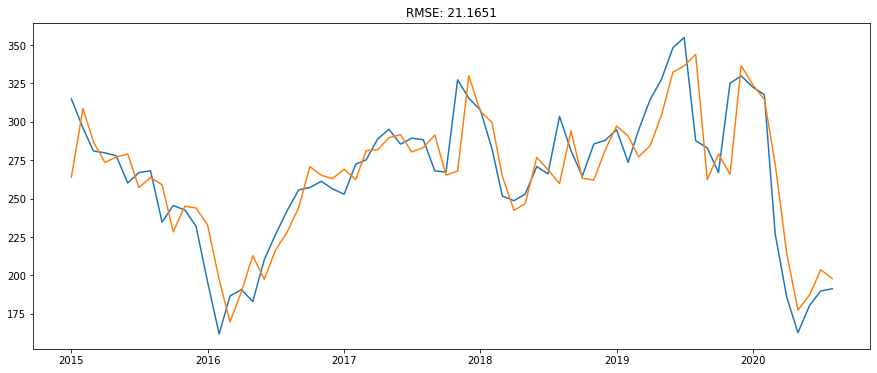

In [66]:
#predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(y)
plt.plot(predictions_ARIMA_diff)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA_diff-y)**2)/len(y)))
#plt.title('MAPE: %.4f'% np.mean((predictions_ARIMA_diff-y)/y))